In [41]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
iris_dataset = load_iris()

In [49]:
print("Keys of iris_dataset:\n", iris_dataset.keys())
print( "feature names", iris_dataset['feature names'])
print( type(iris_dataset), iris_dataset.data[:10])

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


KeyError: 'feature names'

In [50]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

# ['data', 'target', 'target_names', 'DESCR', 'feature_names'])

print(iris_dataset['DESCR'][:193] + "\n...")
print("Target names:", iris_dataset['target_names'])
print("Feature names:\n", iris_dataset['feature_names'])
print("Target names:", iris_dataset['target_names'])
print("Feature names:\n", iris_dataset['feature_names'])
print("Type of data:", type(iris_dataset['data']))
print("Shape of data:", iris_dataset['data'].shape)
print("First five rows of data:\n", iris_dataset['data'][:5])
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)
print("Target:\n", iris_dataset['target'])

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [54]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


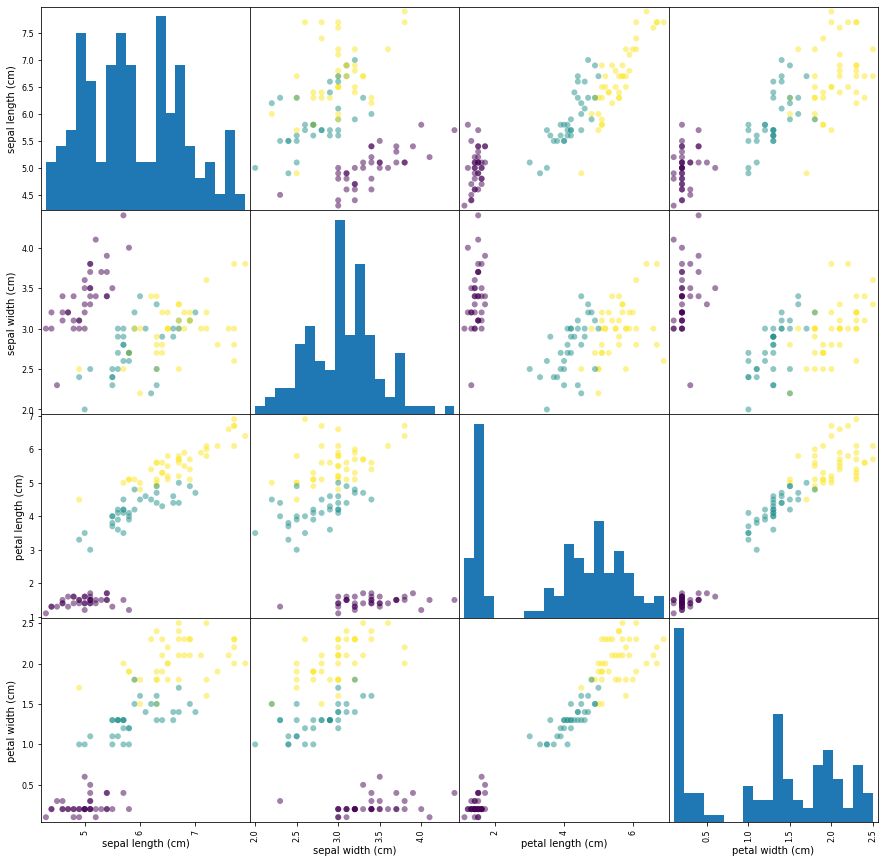

In [55]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20})
plt.show()

In [7]:
from sklearn import metrics #for checking the model accuracy

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# Predict for test dataset set aside
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Test set score using Metrics : ", metrics.accuracy_score(y_pred,y_test))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97
Test set score using Metrics :  0.9736842105263158


In [10]:
# Predict for a new data element
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:", iris_dataset['target_names'][prediction])


X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


In [11]:
# Decison Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


In [12]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score using Metrics : ", metrics.accuracy_score(y_pred,y_test))


Test set score: 0.97
Test set score using Metrics :  0.9736842105263158


In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

logr = LogisticRegression()
logr.fit(X_train,y_train)

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logr.predict(X_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is', acc_log)

The accuracy of the Logistic Regression is 0.868421052631579


In [15]:
# Logistic Regression
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm

sv = svm.SVC() #select the algorithm
sv.fit(X_train,y_train) # we train the algorithm with the training data and the training output

C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
acc_svm = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.9736842105263158


In [17]:
from sklearn.linear_model import LinearRegression
X = np.array([[2],[3],[4],[5]])
y = np.array([[4],[6],[8],[10]])

In [18]:
lr = LinearRegression().fit(X,y)

In [19]:
print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

w[0]: 2.000000  b: -0.000000


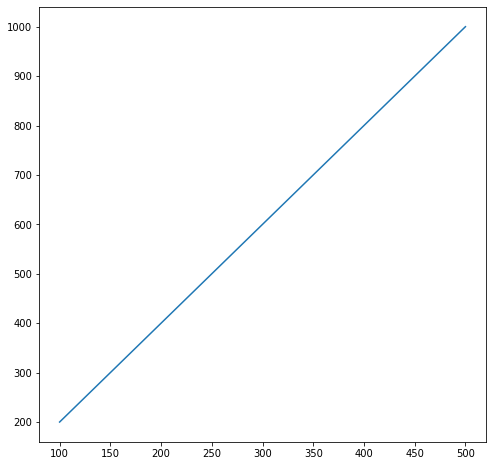

In [20]:
plt.figure(figsize=(8, 8))
X_test = np.array([[100],[300],[400],[500]])
plt.plot(X_test, lr.predict(X_test))

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

In [22]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [23]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [24]:
print(boston.target.shape)

bos['PRICE'] = boston.target
print(bos.head())

print(bos.describe())

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

(506,)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320   

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

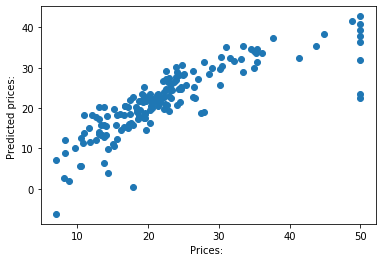

Linear Train Score :  0.7551332741779998
Linear Test Score :  0.6956551656111607


In [29]:
from sklearn.metrics import mean_squared_error
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.show()

#mse = mean_squared_error(Y_test, Y_pred)
#print(mse)
print("Linear Train Score : ", lm.score(X_train, Y_train))
print("Linear Test Score : ", lm.score(X_test, Y_test))

In [30]:
from sklearn.linear_model import Ridge
# L2 Regularization

ridge1 = Ridge().fit(X_train, Y_train)
#Y_pred = ridge.predict(X_test)

#ridge_mse = mean_squared_error(Y_test, Y_pred)
#print(ridge_mse)
print("Ridge Train Score : ", ridge1.score(X_train, Y_train))
print("Ridge Test Score : ", ridge1.score(X_test, Y_test))

Ridge Train Score :  0.7535758947696942
Ridge Test Score :  0.6875095305967148


In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, Y_train)
#Y_pred = ridge10.predict(X_test)

print("Ridge Train Score : ", ridge10.score(X_train, Y_train))
print("Ridge Test Score : ", ridge10.score(X_test, Y_test))

Ridge Train Score :  0.7495921203154411
Ridge Test Score :  0.6777662920969967


In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)
#Y_pred = ridge01.predict(X_test)

print("Ridge Train Score : ", ridge01.score(X_train, Y_train))
print("Ridge Test Score : ", ridge01.score(X_test, Y_test))

Ridge Train Score :  0.7550804395851756
Ridge Test Score :  0.6944160494320184


In [33]:
ridge001 = Ridge(alpha=0.01).fit(X_train, Y_train)
#Y_pred = ridge001.predict(X_test)

print("Ridge Train Score : ", ridge001.score(X_train, Y_train))
print("Ridge Test Score : ", ridge001.score(X_test, Y_test))

Ridge Train Score :  0.7551326439674304
Ridge Test Score :  0.6955255075945372


In [34]:
# Lesso

from sklearn.linear_model import Lasso
# L1 Regularization

lasso1 = Lasso().fit(X_train, Y_train)

print("Lasso Train Score : ", lasso1.score(X_train, Y_train))
print("Lasso Test Score : ", lasso1.score(X_test, Y_test))
print("Number of features used : ", np.sum(lasso1.coef_ != 0))

Lasso Train Score :  0.7039626407414621
Lasso Test Score :  0.6437685059710161
Number of features used :  11


In [35]:
lasso1 = Lasso(max_iter=10000).fit(X_train, Y_train)

print("Lasso Train Score : ", lasso1.score(X_train, Y_train))
print("Lasso Test Score : ", lasso1.score(X_test, Y_test))
print("Number of features used : ", np.sum(lasso1.coef_ != 0))

Lasso Train Score :  0.7039626407414621
Lasso Test Score :  0.6437685059710161
Number of features used :  11


In [36]:
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, Y_train)

print("Lasso Train Score : ", lasso01.score(X_train, Y_train))
print("Lasso Test Score : ", lasso01.score(X_test, Y_test))
print("Number of features used : ", np.sum(lasso01.coef_ != 0))

Lasso Train Score :  0.7546387847807497
Lasso Test Score :  0.6904398691328169
Number of features used :  13


In [37]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, Y_train)

print("Lasso Train Score : ", lasso001.score(X_train, Y_train))
print("Lasso Test Score : ", lasso001.score(X_test, Y_test))
print("Number of features used : ", np.sum(lasso001.coef_ != 0))

Lasso Train Score :  0.7551283290473348
Lasso Test Score :  0.6951846769583666
Number of features used :  13


In [38]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

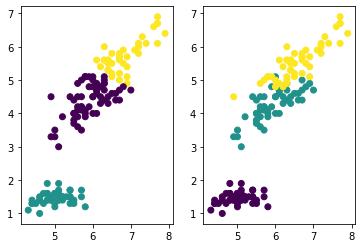

In [39]:
from sklearn.cluster import KMeans

X = iris_dataset.data   #[:, [0,2]]
y = iris_dataset.target

km = KMeans(n_clusters = 3, random_state=21) # , n_jobs = 4
km.fit(X)

# Dataset Slicing
x_axis = iris_dataset.data[:, 0]  # Sepal Length
y_axis = iris_dataset.data[:, 2]  # petal Length

plt.subplot(1,2,1)

plt.scatter(x_axis, y_axis, c=km.labels_)

plt.subplot(1,2,2)
plt.scatter(x_axis, y_axis, c=iris_dataset.target)
plt.show()


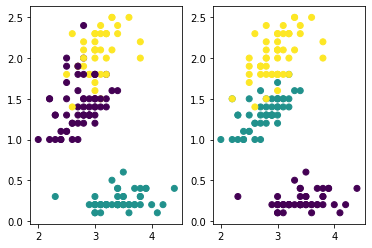

In [40]:
from sklearn.cluster import KMeans

X = iris_dataset.data   #[:, [0,2]]
y = iris_dataset.target

km = KMeans(n_clusters = 3, random_state=21) # , n_jobs = 4
km.fit(X)

# Dataset Slicing
x_axis = iris_dataset.data[:, 1]  # Sepal Width
y_axis = iris_dataset.data[:, 3]  # petal Width

plt.subplot(1,2,1)

plt.scatter(x_axis, y_axis, c=km.labels_)

plt.subplot(1,2,2)
plt.scatter(x_axis, y_axis, c=iris_dataset.target)
plt.show()
